In [2]:
pip install tensorflow

  Using cached numpy-1.24.3-cp310-cp310-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot uninstall numpy 1.25.0, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps numpy==1.25.0'.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
df = pd.read_csv('fetal_health.csv')

In [5]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
y = df['fetal_health']
X = df.drop('fetal_health', axis=1)
display(y)
X

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


C:\Users\Hriday\AppData\Local\Temp\ipykernel_2616\3617041607.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_df['baseline value'])
C:\Users\Hriday\AppData\Local\Temp\ipykernel_2616\3617041607.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_df['accelerations'])


<Axes: xlabel='accelerations', ylabel='Density'>

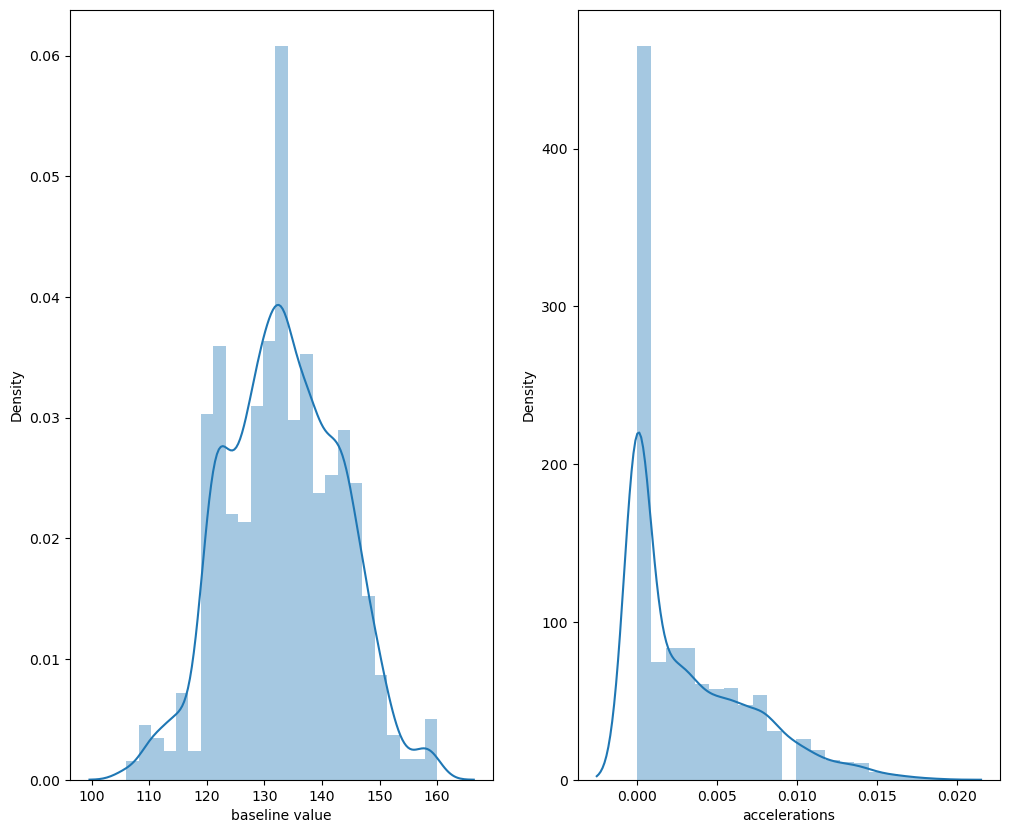

In [9]:
combined_df = pd.concat([X, y], axis=1)

plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
sns.distplot(combined_df['baseline value'])

plt.subplot(1,2,2)
sns.distplot(combined_df['accelerations'])

# plt.subplot(2,2,3)
# sns.distplot(combined_df['fetal_movement'])

# plt.subplot(2,2,4)
# sns.distplot(combined_df['uterine_contractions'])


In [10]:
combined_df = pd.concat([X, y], axis=1)

<Axes: >

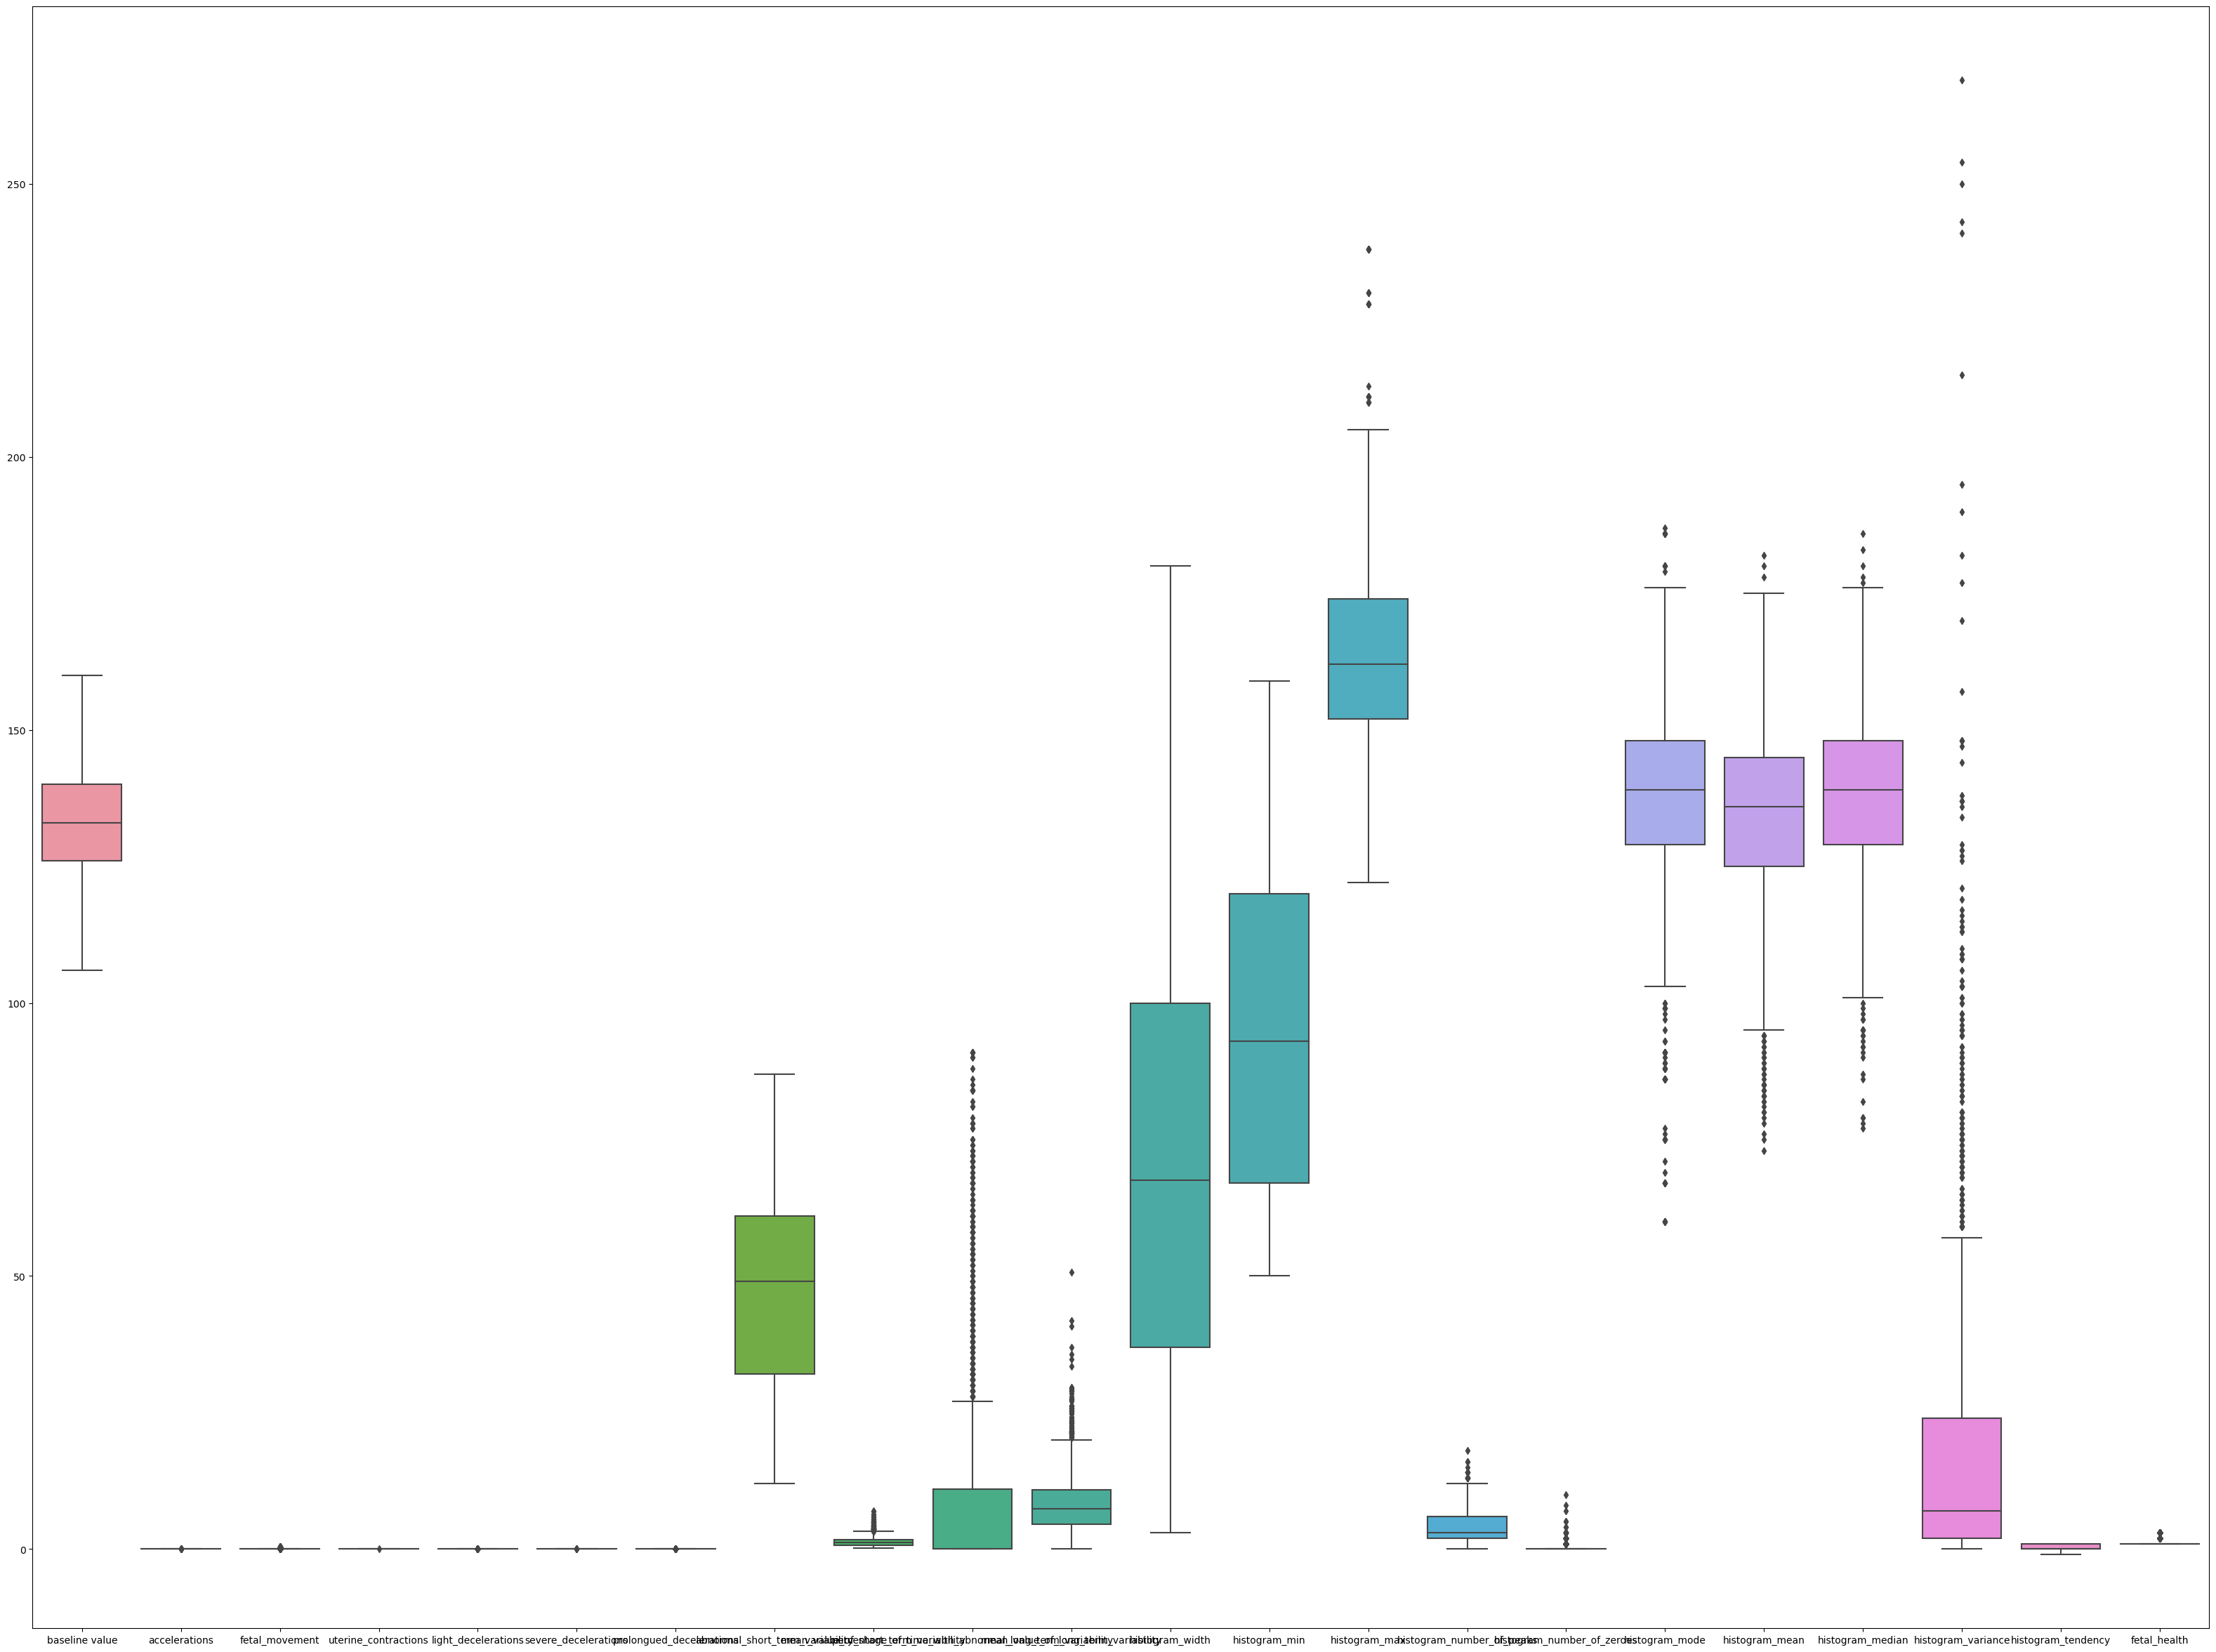

In [11]:
plt.figure(figsize=(40,30))

sns.boxplot(data=combined_df)


In [12]:
#outlier detection through inter-quartile range

def remove_outliers_iqr(combined_df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = combined_df[((combined_df >= lower_bound) & (combined_df <= upper_bound)).all(axis=1)]
    return df_no_outliers

# Remove outliers from the dataset
combined_df = remove_outliers_iqr(combined_df)

# If needed, you can reset the index of the resulting DataFrame
combined_df.reset_index(drop=True, inplace=True)


<Axes: >

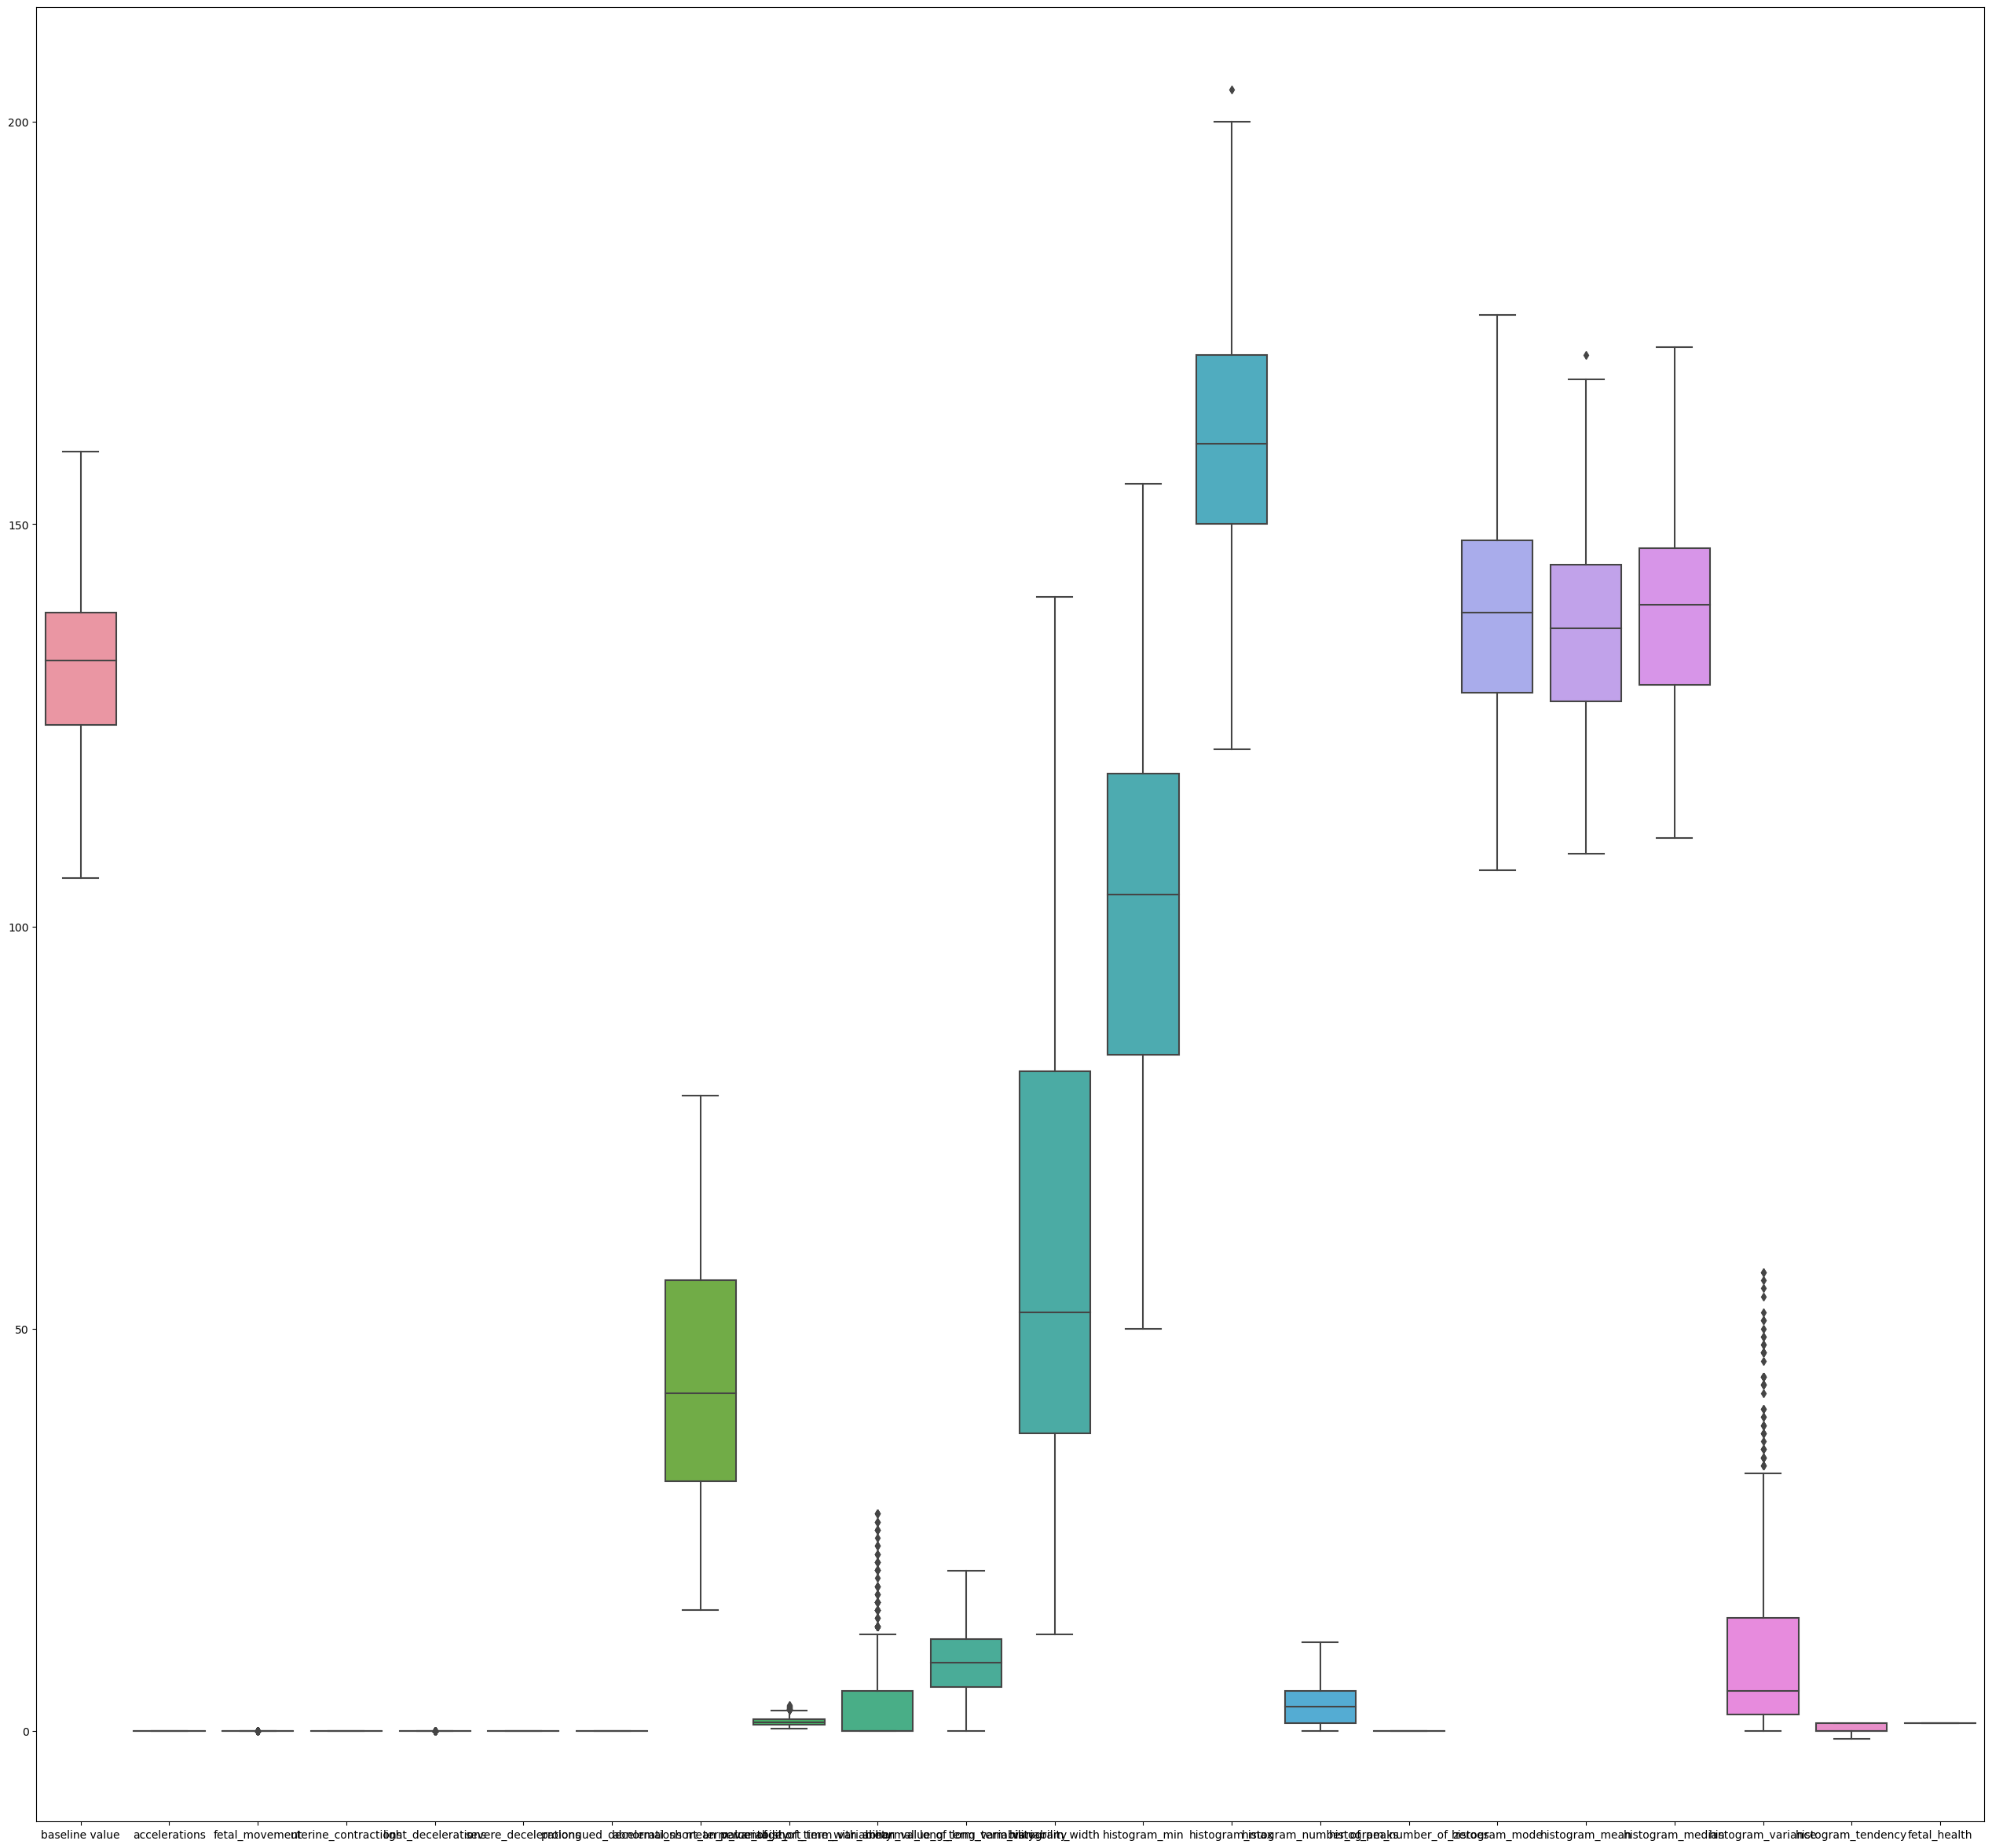

In [13]:
plt.figure(figsize=(32,30))

sns.boxplot(data=combined_df)


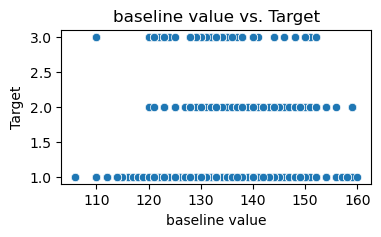

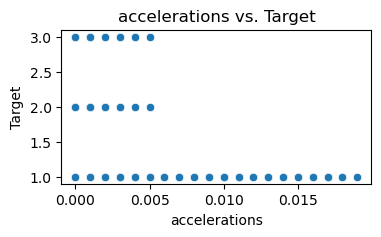

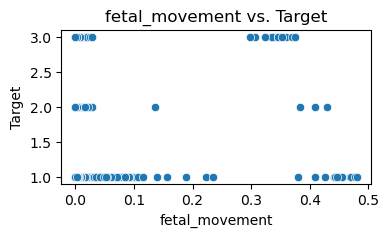

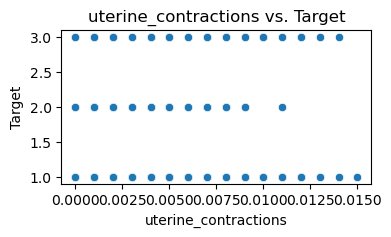

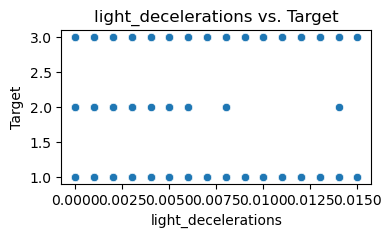

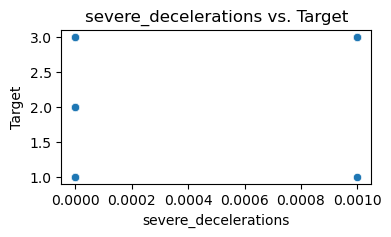

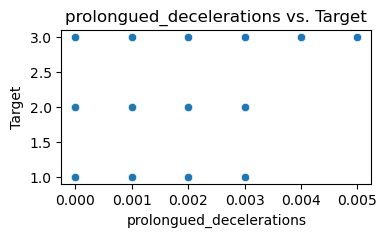

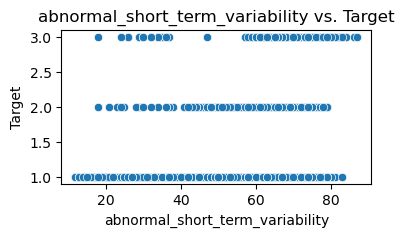

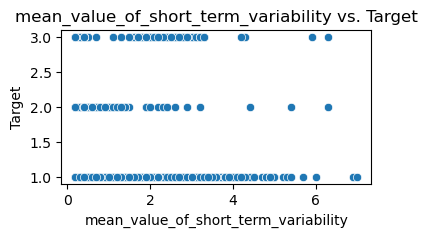

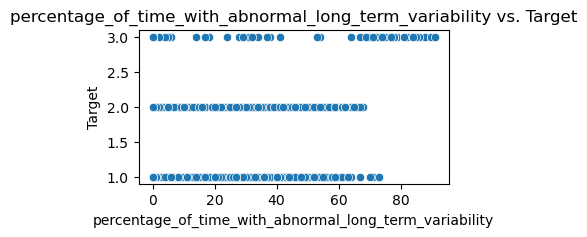

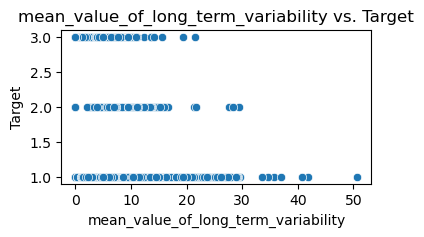

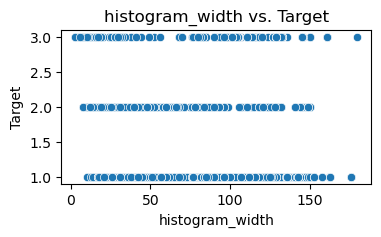

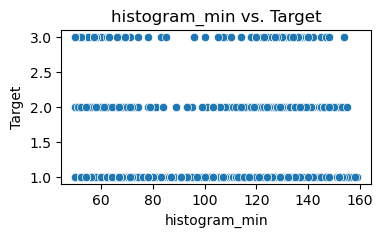

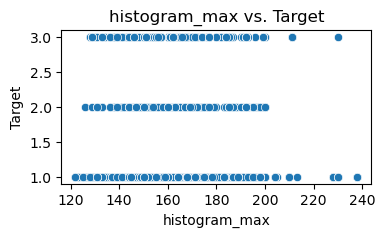

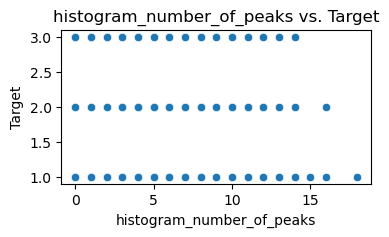

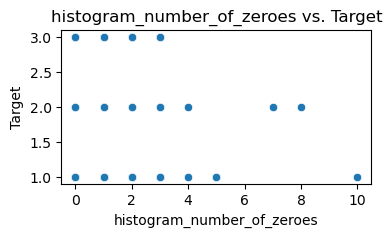

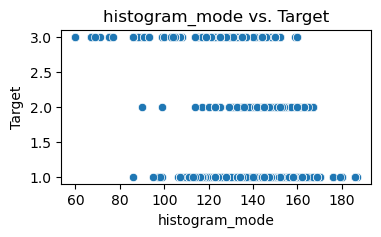

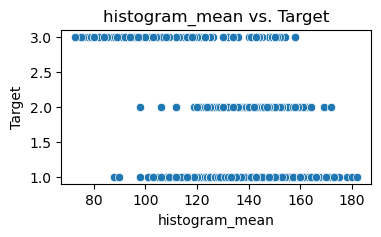

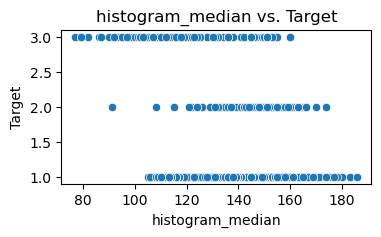

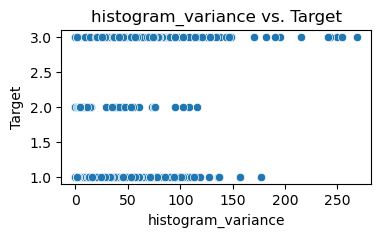

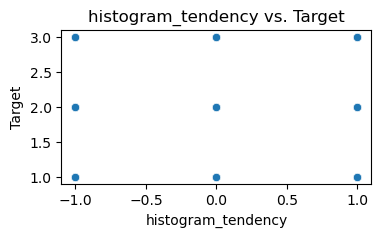

In [14]:
combined_df = pd.concat([X, y], axis=1)

# Loop through each feature and create a separate plot
for feature_name in X.columns:
    plt.figure(figsize=(4, 2))  # Adjust the figure size as needed
    sns.scatterplot(x=feature_name, y='fetal_health', data=combined_df)
    plt.title(f'{feature_name} vs. Target')
    plt.xlabel(feature_name)
    plt.ylabel('Target')
    plt.show()
    


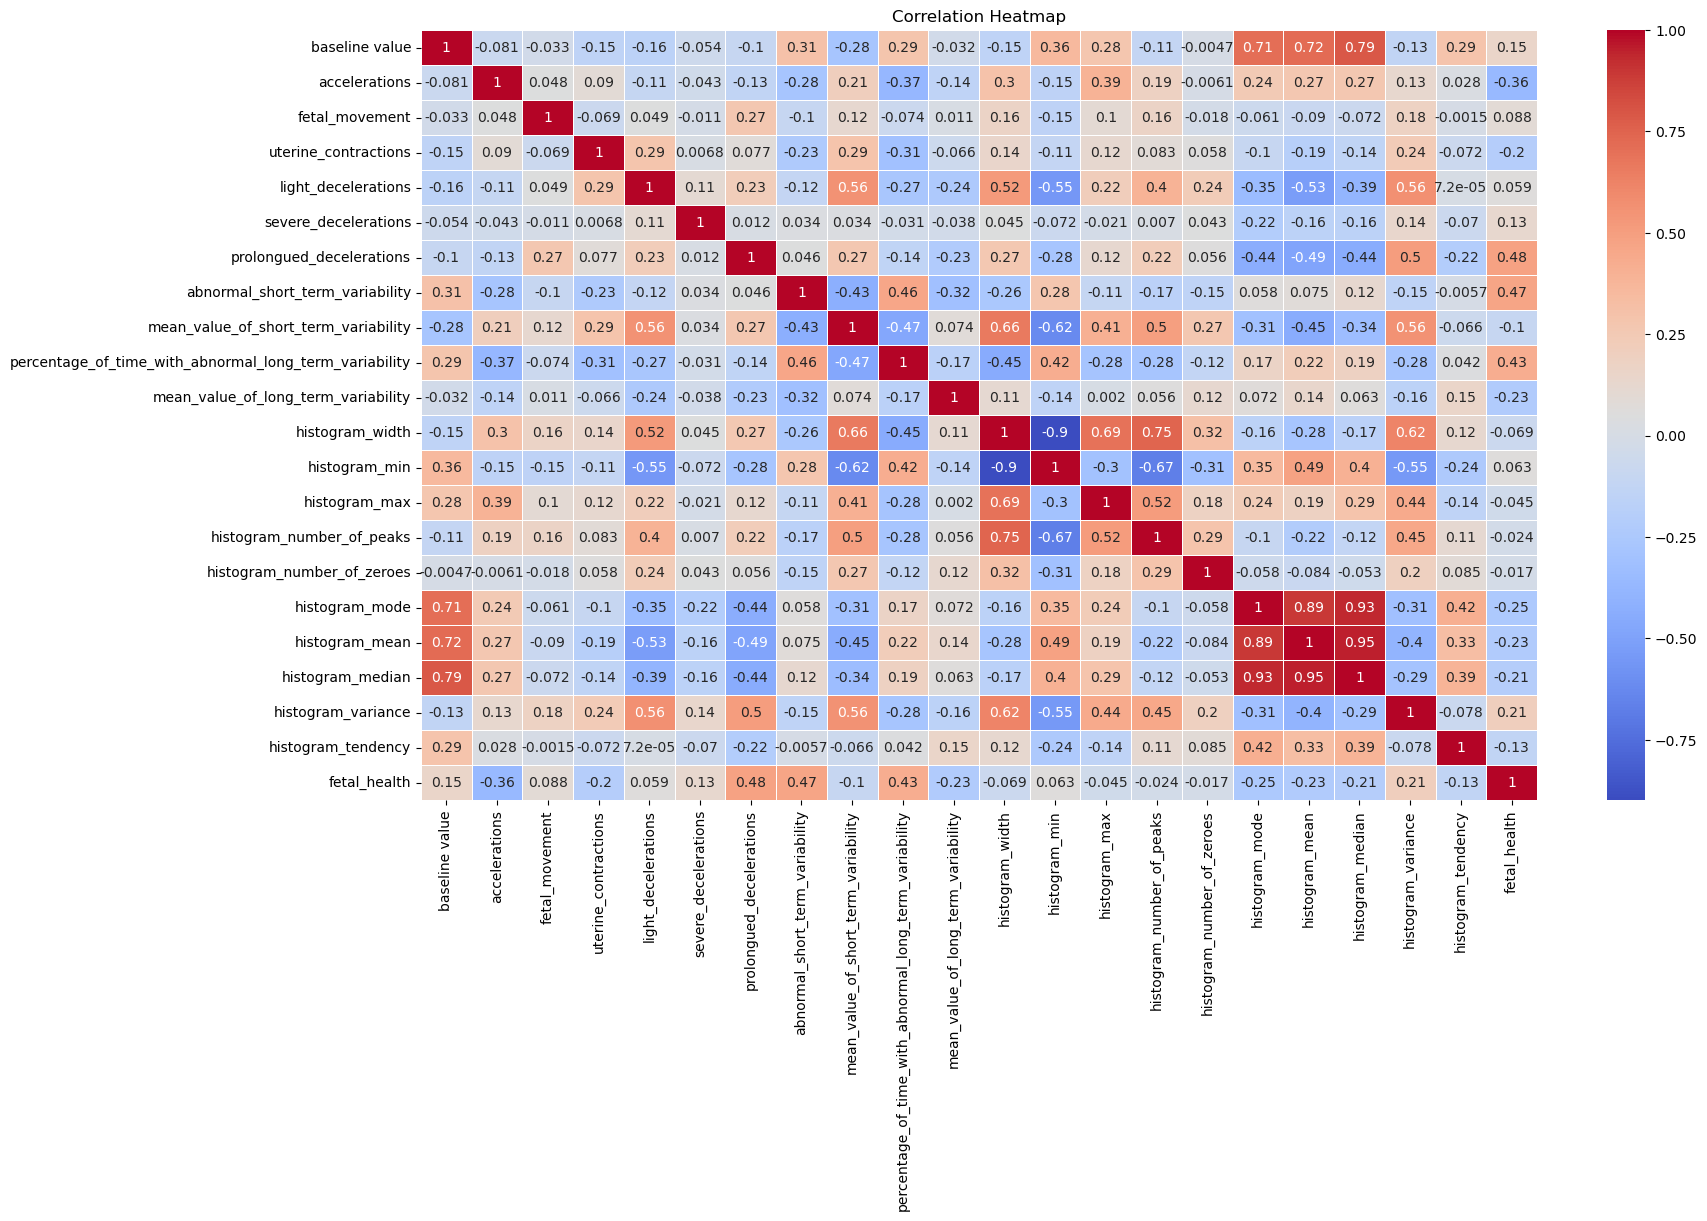

In [15]:
correlation_matrix = combined_df.corr()

# Create a heatmap
plt.figure(figsize=(18, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

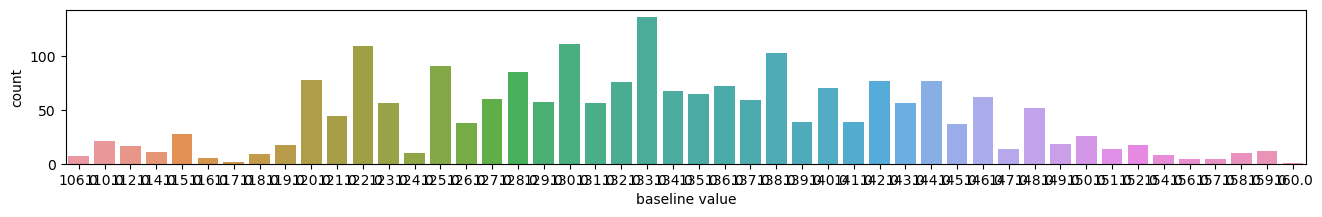

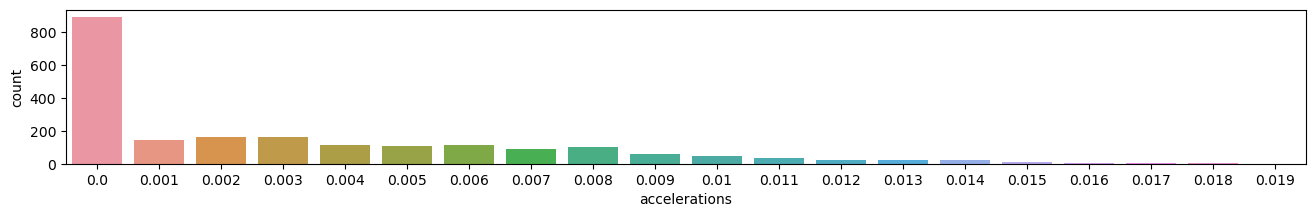

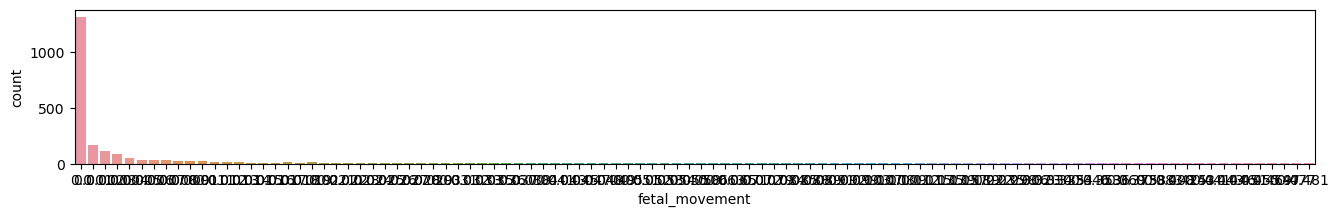

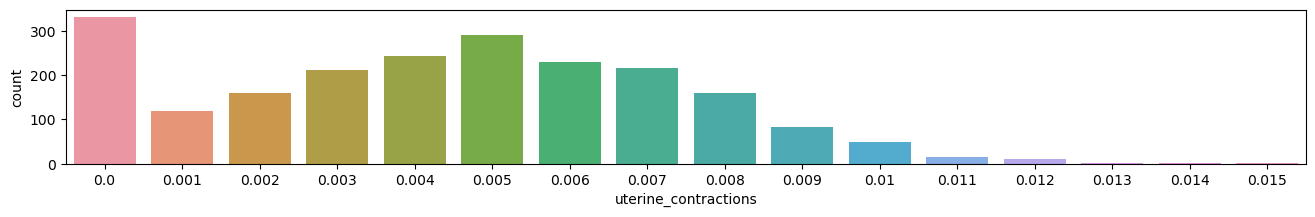

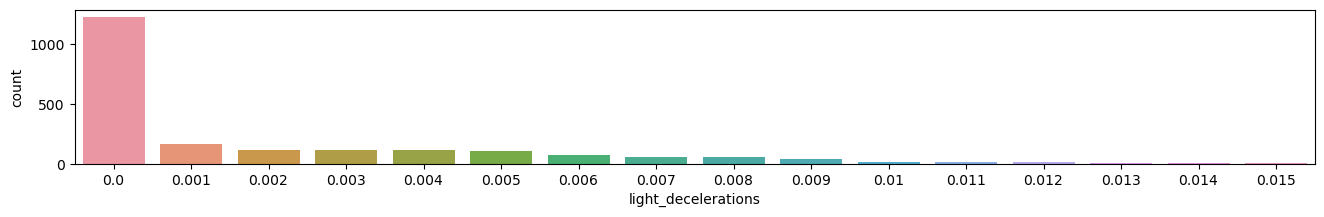

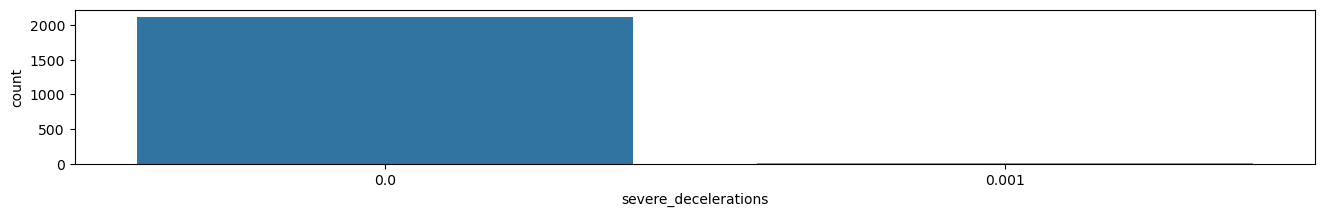

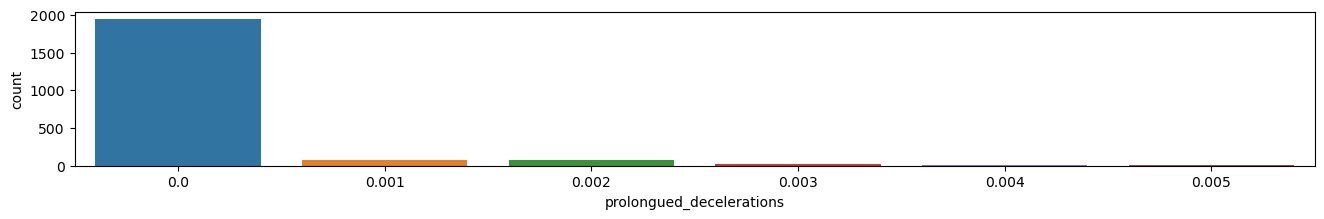

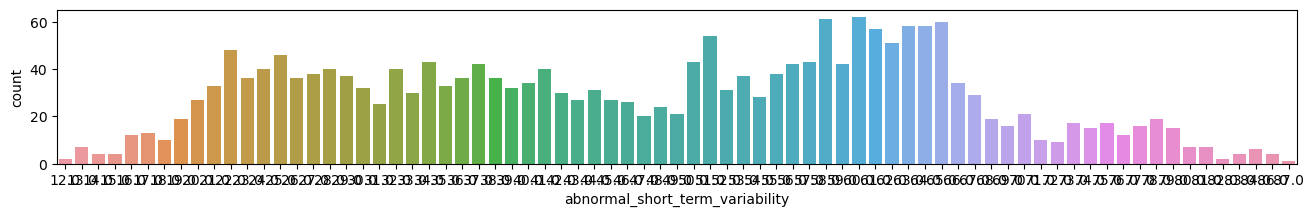

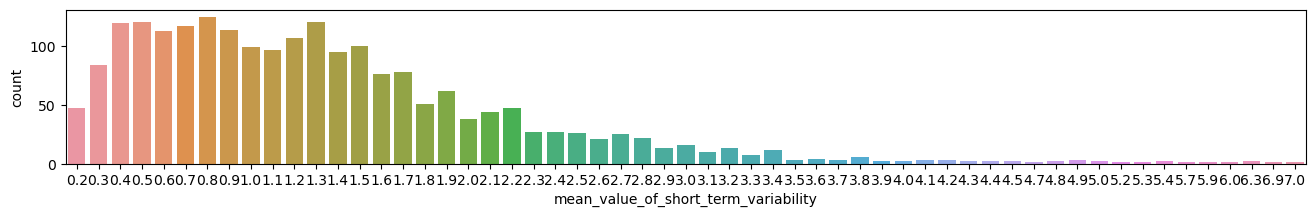

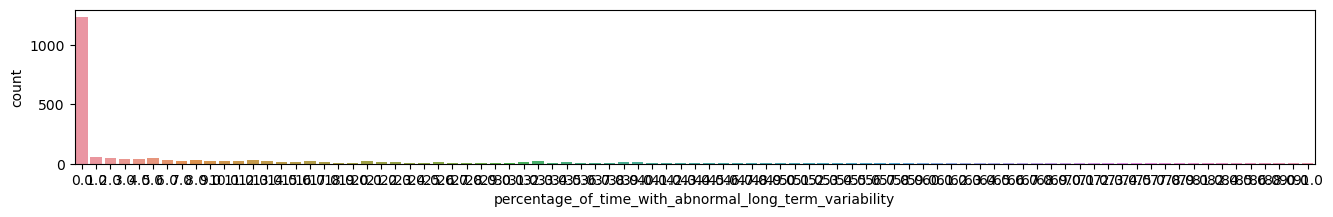

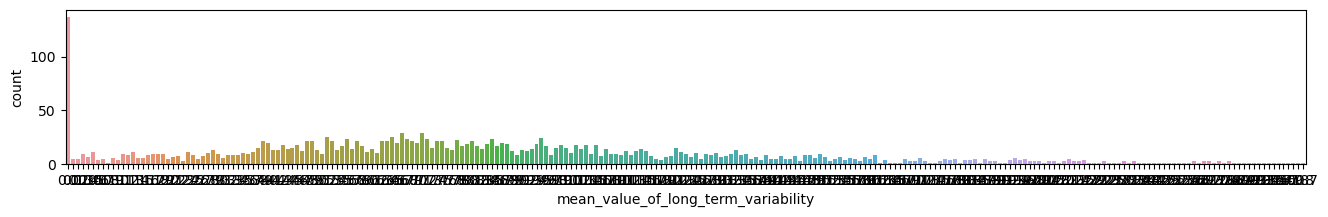

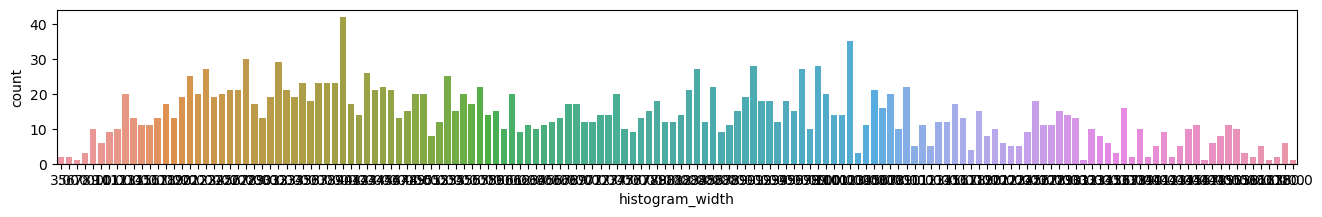

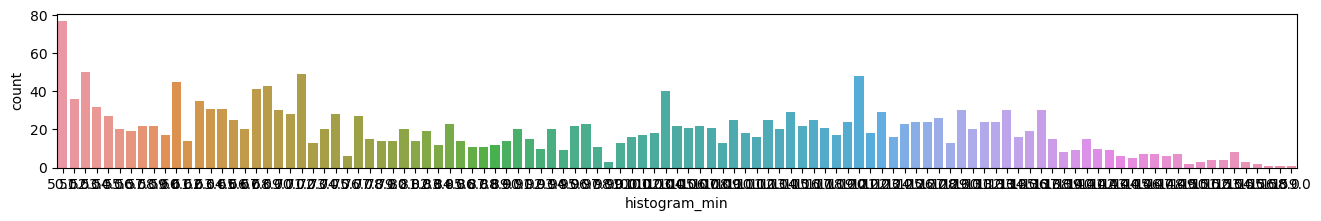

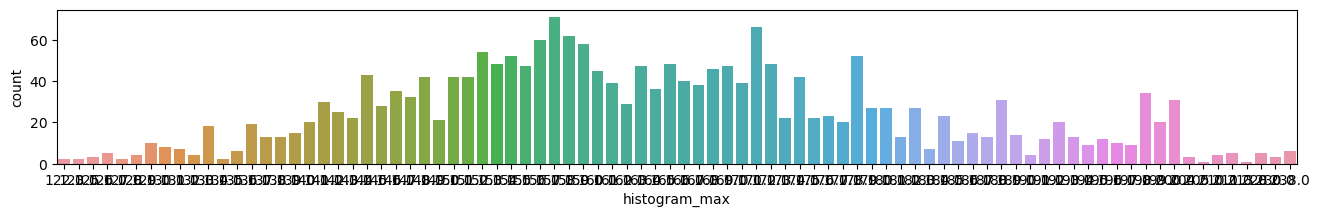

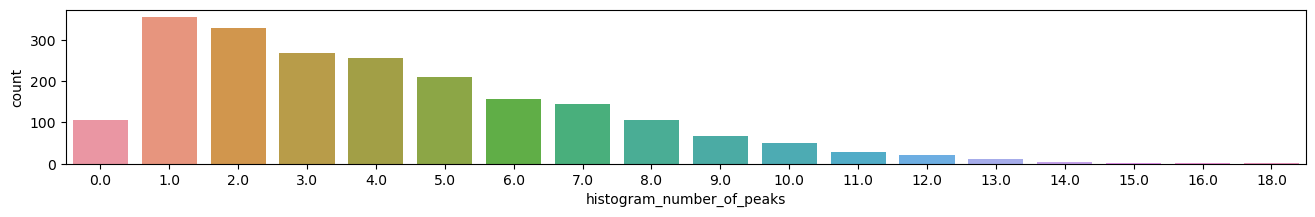

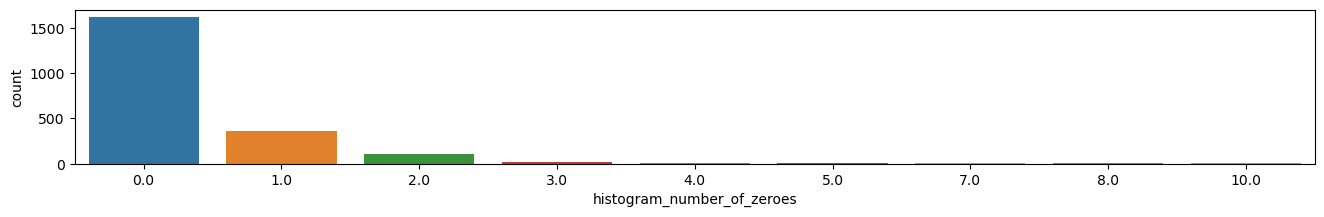

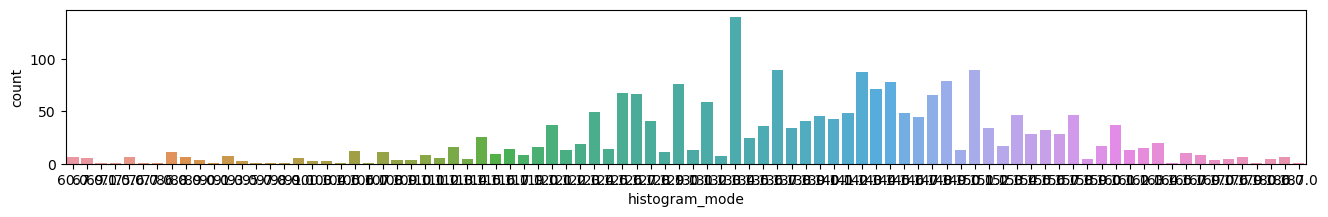

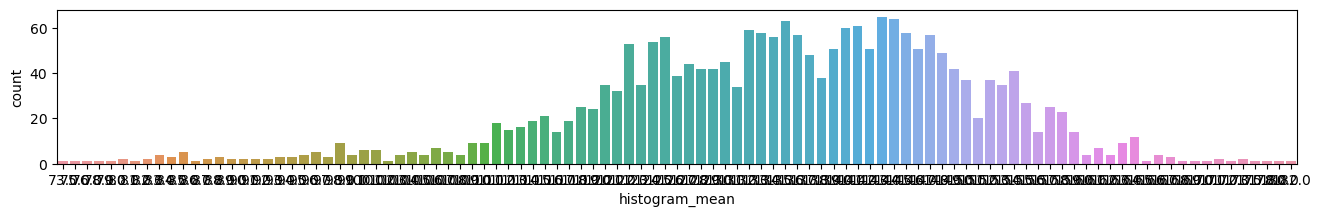

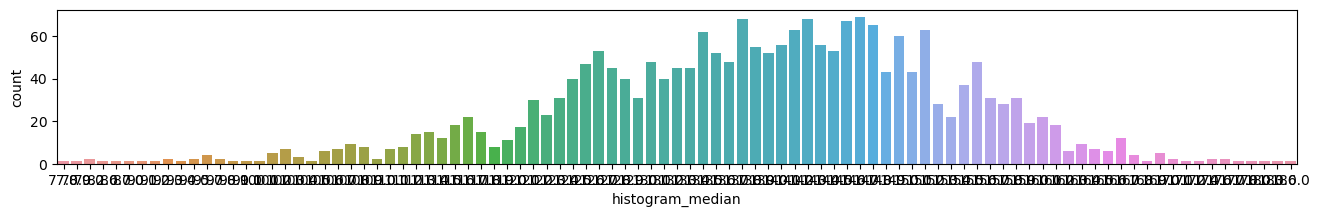

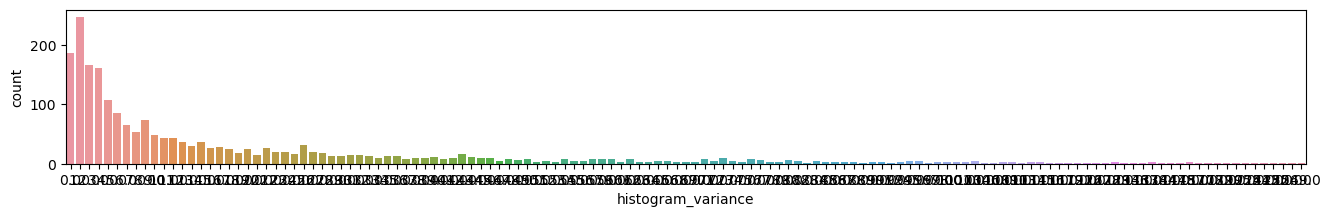

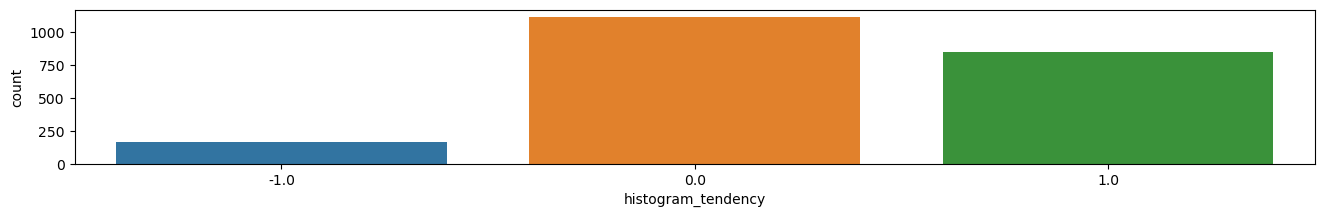

In [16]:
for feature in X.columns:
    plt.figure(figsize=(16,2))
    sns.countplot(data=X, x=feature)
#     plt.title(f"{feature}")
    plt.show()

In [17]:
# Mean Normalization of Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)

X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,0.259259,0.000000,0.0,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527,...,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0
1,0.481481,0.315789,0.0,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000,...,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5
2,0.500000,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000,...,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5
3,0.518519,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000,...,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0
4,0.481481,0.368421,0.0,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000,...,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0


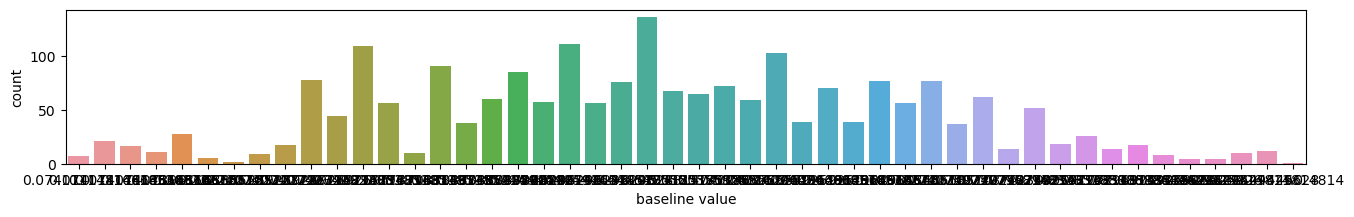

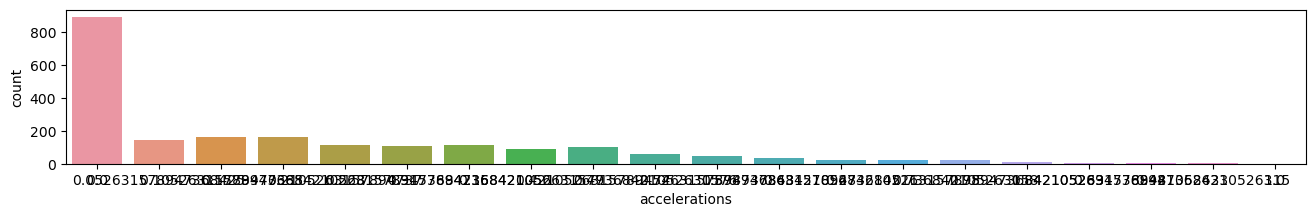

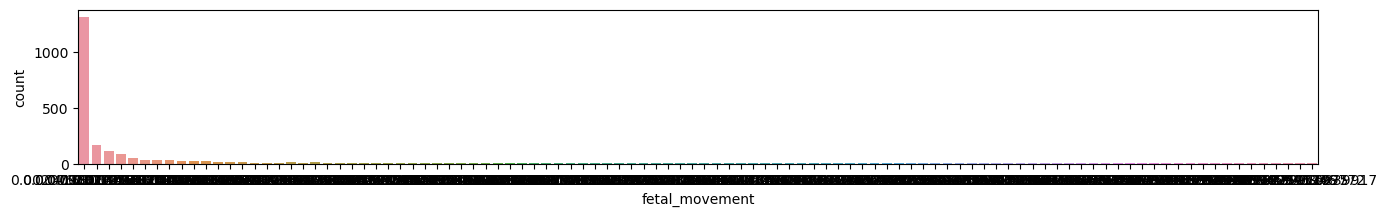

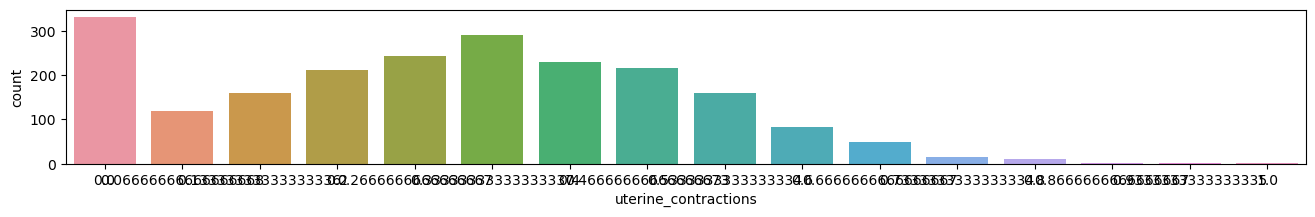

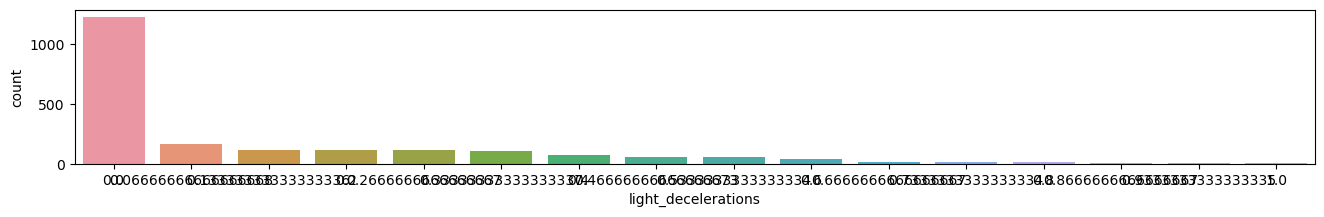

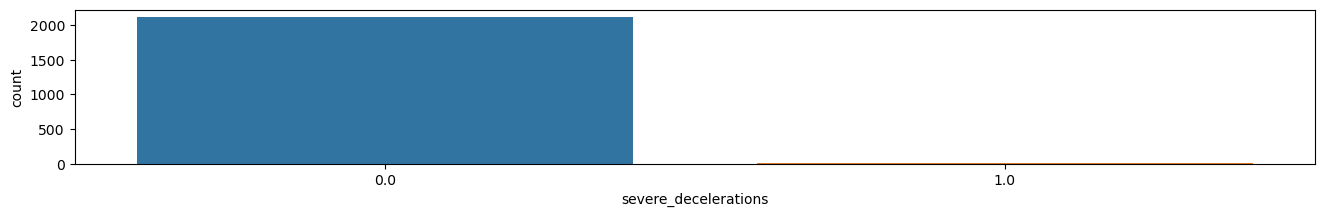

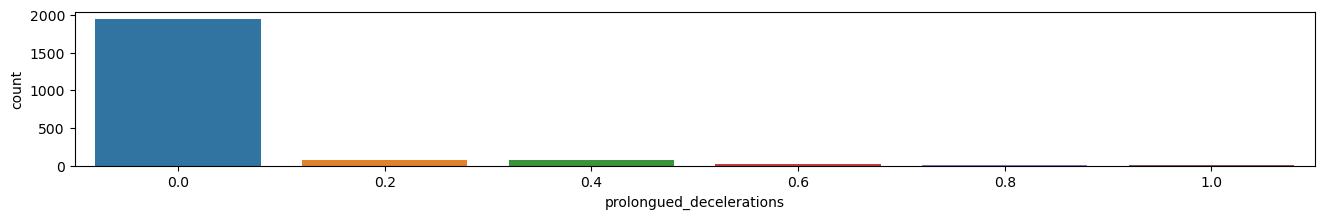

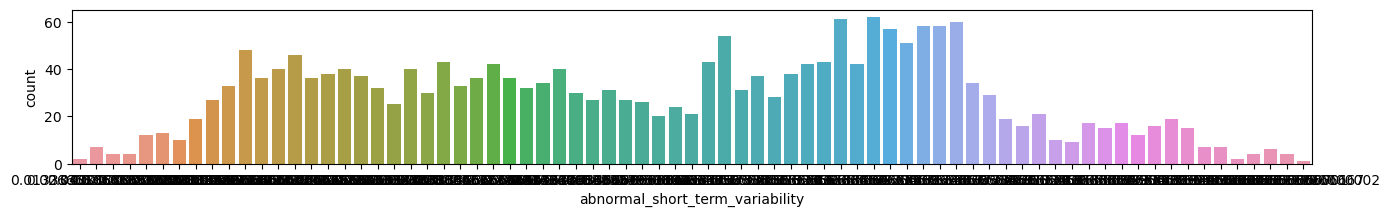

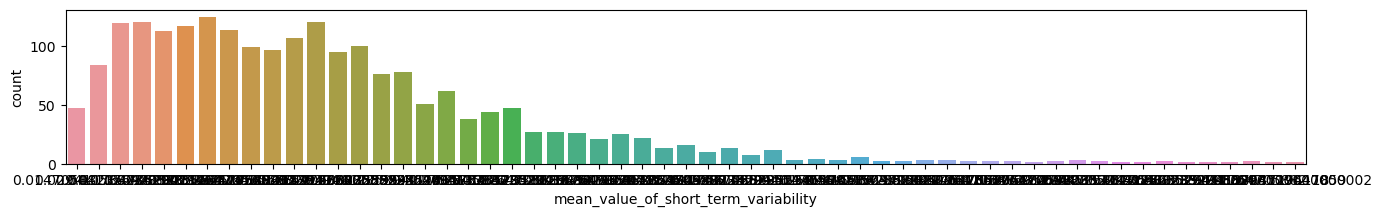

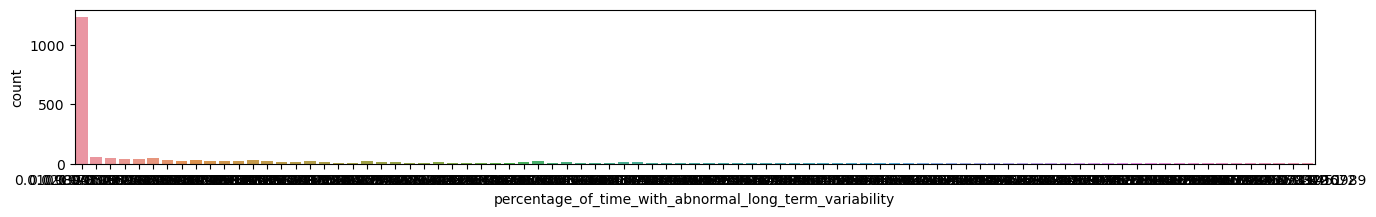

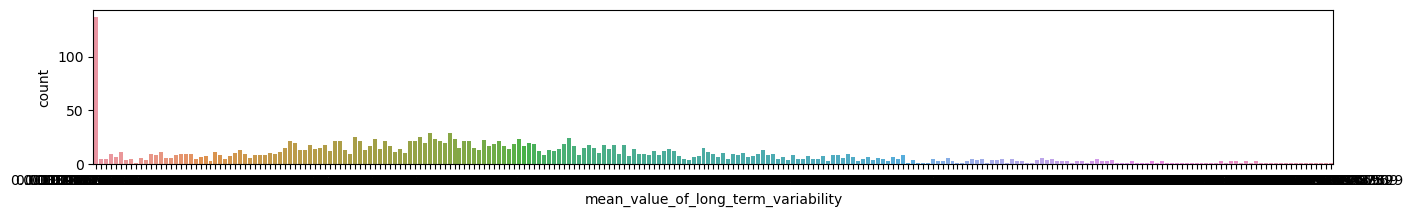

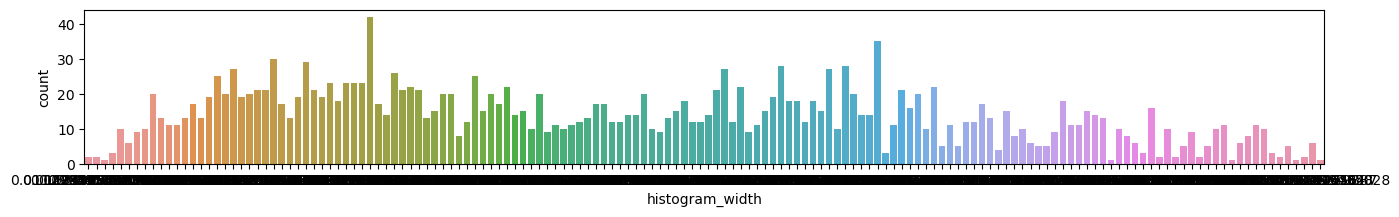

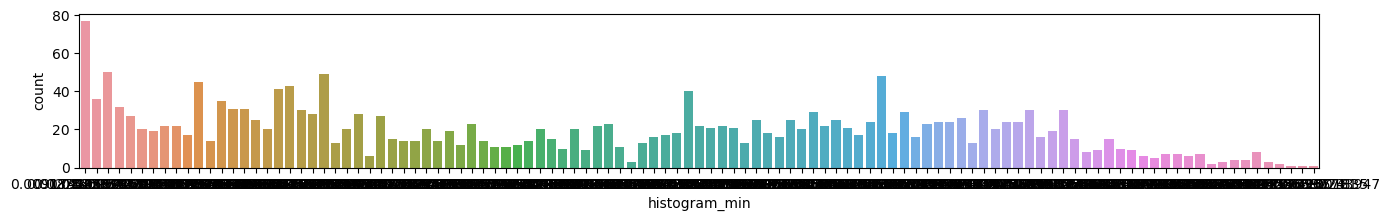

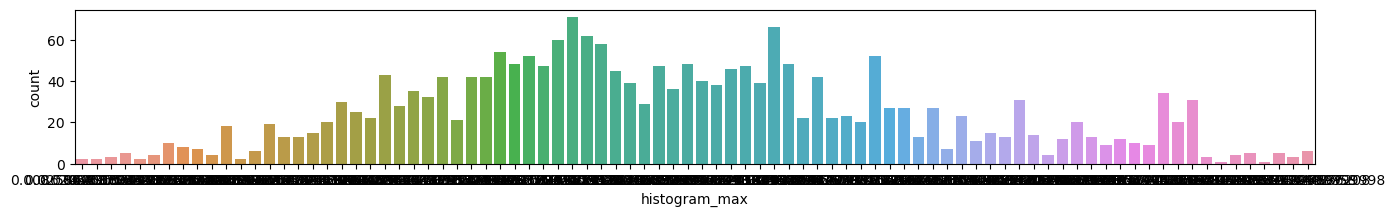

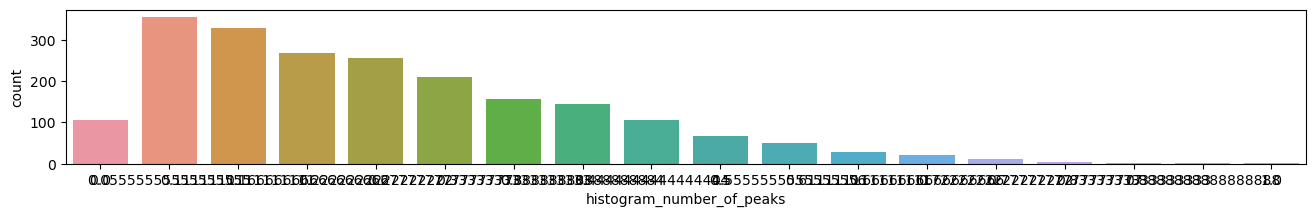

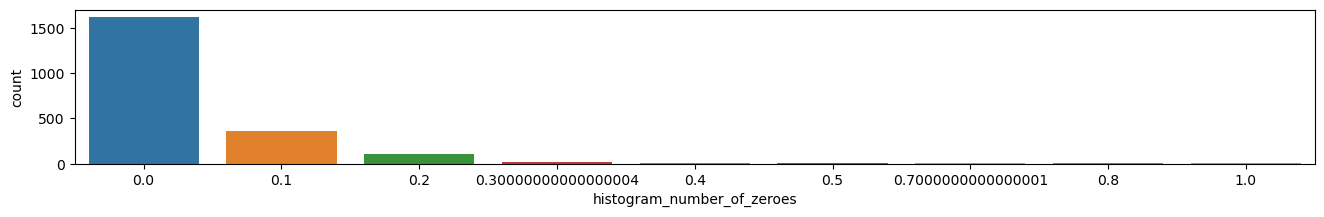

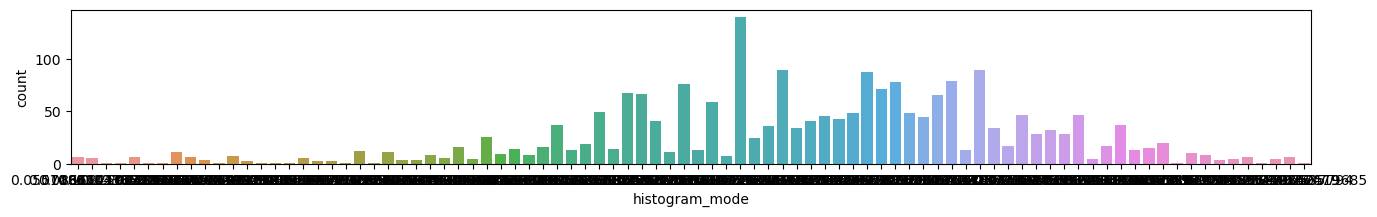

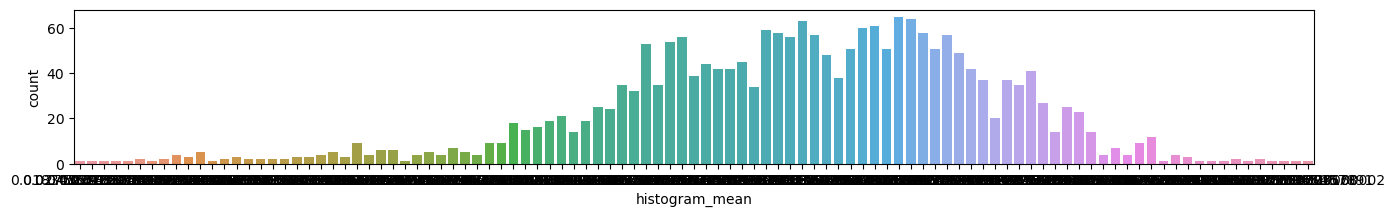

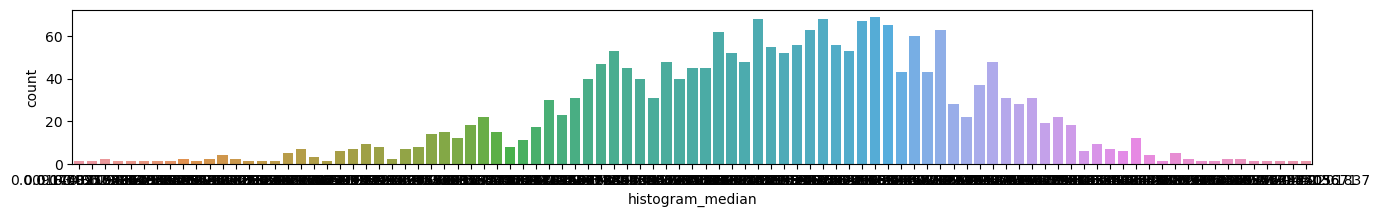

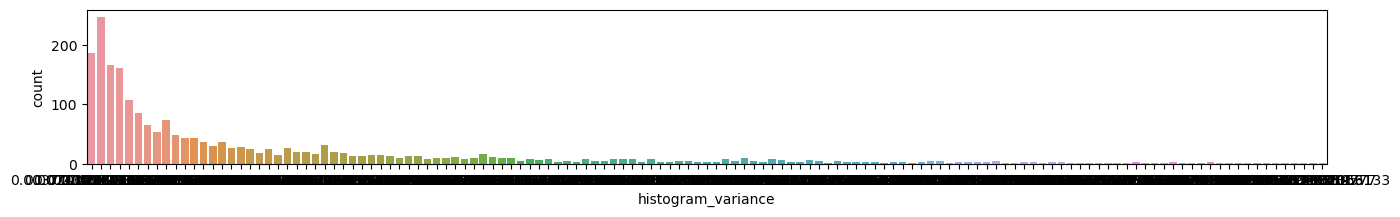

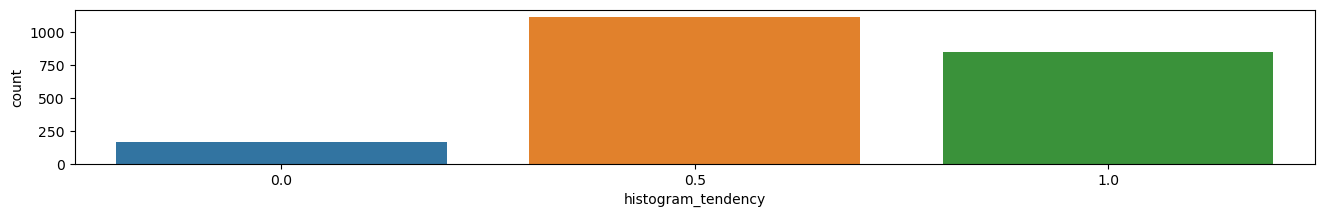

In [18]:
for feature in X.columns:
    plt.figure(figsize=(16,2))
    sns.countplot(data=X, x=feature)
#     plt.title(f"{feature}")
    plt.show()

In [19]:
X.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [20]:
### There are no null values, no cleaning is required
### Also there is no categorical data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


selector = SelectKBest(score_func=f_classif, k='all')


X_new = selector.fit(X_train, y_train)


feature_scores = X_new.scores_


feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})


feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

print(feature_scores_df)


                                              Feature       Score
6                            prolongued_decelerations  418.588365
7                     abnormal_short_term_variability  278.594811
9   percentage_of_time_with_abnormal_long_term_var...  256.430083
17                                     histogram_mean  255.903932
16                                     histogram_mode  229.562053
18                                   histogram_median  209.053991
1                                       accelerations  158.120700
19                                 histogram_variance  128.829548
0                                      baseline value  118.448943
8                mean_value_of_short_term_variability   90.293930
3                                uterine_contractions   77.214874
12                                      histogram_min   68.304656
10                mean_value_of_long_term_variability   59.691534
4                                 light_decelerations   56.112162
11        

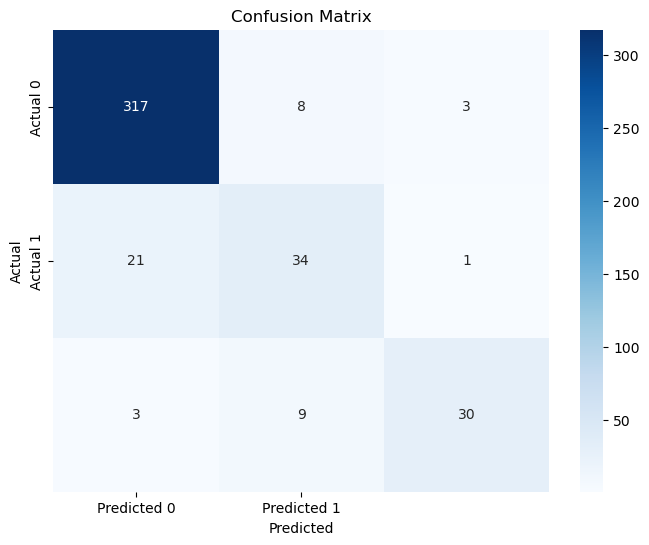

Accuracy: 0.8943661971830986
              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       328
         2.0       0.67      0.61      0.64        56
         3.0       0.88      0.71      0.79        42

    accuracy                           0.89       426
   macro avg       0.83      0.76      0.79       426
weighted avg       0.89      0.89      0.89       426



In [27]:
## Model 1: Sklearn logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=420)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))


In [59]:
y_train -= 1
y_test -= 1
y_train

1051    0.0
899     0.0
111     0.0
876     0.0
360     1.0
       ... 
1208    0.0
1033    0.0
278     0.0
439     1.0
1626    0.0
Name: fetal_health, Length: 1700, dtype: float64

In [60]:
#Model 2 : Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

#applied different values of n_estimators to find out the approximate value where the accuracy is maximum
model_ensemble = RandomForestClassifier(n_estimators = 160,random_state = 42)

model_ensemble.fit(X_train,y_train)

y_pred = model_ensemble.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.9530516431924883
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.90      0.81      0.85        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.95       426
   macro avg       0.93      0.91      0.92       426
weighted avg       0.95      0.95      0.95       426



In [61]:
#model3 : Support Vector Machine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100]
}

svm_classifier = SVC()

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_svm_classifier = SVC(kernel=best_params['kernel'], C=best_params['C'])
best_svm_classifier.fit(X_train, y_train)

y_pred = best_svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy with Best Hyperparameters:", accuracy)

# Print a classification report
report = classification_report(y_test, y_pred)
print(report)



Best Hyperparameters: {'C': 10, 'kernel': 'poly'}
Accuracy with Best Hyperparameters: 0.9272300469483568
              precision    recall  f1-score   support

         1.0       0.96      0.95      0.96       333
         2.0       0.75      0.80      0.77        64
         3.0       0.96      0.90      0.93        29

    accuracy                           0.93       426
   macro avg       0.89      0.88      0.89       426
weighted avg       0.93      0.93      0.93       426



In [54]:
## Model 3: TF Keras softmax model
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


tf.random.set_seed(69)

model = tf.keras.Sequential([
    Dense(25, activation='relu', input_shape=(21,)),
    Dense(15, activation='relu'),
    Dense(15, activation='relu'),
    Dense(3, activation='linear')
])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

model.compile(optimizer=Adam(learning_rate=0.001),
             loss=SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=150,
                    batch_size=64,
                    validation_data=(X_test, y_test),
#                     callbacks=[early_stopping]
                   )

Epoch 1/150
27/27 [==============================] - 1s 9ms/step - loss: 0.8350 - accuracy: 0.7447 - val_loss: 0.7072 - val_accuracy: 0.7700
Epoch 2/150
27/27 [==============================] - 0s 3ms/step - loss: 0.6470 - accuracy: 0.7806 - val_loss: 0.6389 - val_accuracy: 0.7700
Epoch 3/150
27/27 [==============================] - 0s 3ms/step - loss: 0.5926 - accuracy: 0.7806 - val_loss: 0.5854 - val_accuracy: 0.7700
Epoch 4/150
27/27 [==============================] - 0s 3ms/step - loss: 0.5382 - accuracy: 0.7806 - val_loss: 0.5190 - val_accuracy: 0.7700
Epoch 5/150
27/27 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.7806 - val_loss: 0.4518 - val_accuracy: 0.7723
Epoch 6/150
27/27 [==============================] - 0s 3ms/step - loss: 0.4164 - accuracy: 0.8159 - val_loss: 0.4143 - val_accuracy: 0.8192
Epoch 7/150
27/27 [==============================] - 0s 3ms/step - loss: 0.3726 - accuracy: 0.8524 - val_loss: 0.3613 - val_accuracy: 0.8638
Epoch 8/150
2

Epoch 59/150
27/27 [==============================] - 0s 4ms/step - loss: 0.1677 - accuracy: 0.9253 - val_loss: 0.2197 - val_accuracy: 0.9085
Epoch 60/150
27/27 [==============================] - 0s 4ms/step - loss: 0.1653 - accuracy: 0.9265 - val_loss: 0.2164 - val_accuracy: 0.9108
Epoch 61/150
27/27 [==============================] - 0s 3ms/step - loss: 0.1678 - accuracy: 0.9294 - val_loss: 0.2105 - val_accuracy: 0.9061
Epoch 62/150
27/27 [==============================] - 0s 4ms/step - loss: 0.1682 - accuracy: 0.9294 - val_loss: 0.2172 - val_accuracy: 0.9131
Epoch 63/150
27/27 [==============================] - 0s 3ms/step - loss: 0.1642 - accuracy: 0.9300 - val_loss: 0.2144 - val_accuracy: 0.9085
Epoch 64/150
27/27 [==============================] - 0s 4ms/step - loss: 0.1675 - accuracy: 0.9312 - val_loss: 0.2229 - val_accuracy: 0.9178
Epoch 65/150
27/27 [==============================] - 0s 3ms/step - loss: 0.1673 - accuracy: 0.9282 - val_loss: 0.2110 - val_accuracy: 0.9108
Epoch 

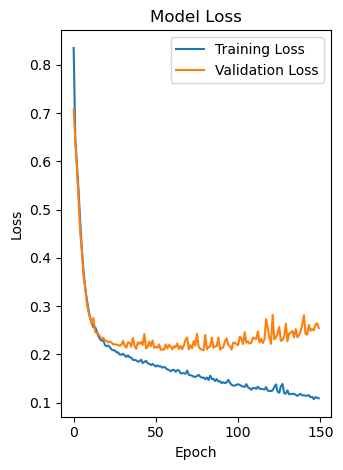

In [55]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [56]:
# Evaluate the model on the validation data
final_val_loss, final_val_accuracy = model.evaluate(X_test, y_test)

print(f'Final Validation Loss: {final_val_loss:.4f}')
print(f'Final Validation Accuracy: {final_val_accuracy:.4f}')

14/14 [==============================] - 0s 2ms/step - loss: 0.2548 - accuracy: 0.9319
Final Validation Loss: 0.2548
Final Validation Accuracy: 0.9319


In [58]:
## model 3: Another neural network with different layers

tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(21,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='linear')
])

model3.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    restore_best_weights=True
)

history3 = model3.fit(X_train, y_train,
          epochs=200,
          batch_size=64,
          validation_data=[X_test, y_test],
          callbacks=[early_stopping])

Epoch 1/200
27/27 [==============================] - 1s 10ms/step - loss: 0.7504 - accuracy: 0.7806 - val_loss: 0.6400 - val_accuracy: 0.7700
Epoch 2/200
27/27 [==============================] - 0s 3ms/step - loss: 0.5285 - accuracy: 0.7853 - val_loss: 0.4396 - val_accuracy: 0.8192
Epoch 3/200
27/27 [==============================] - 0s 4ms/step - loss: 0.3659 - accuracy: 0.8600 - val_loss: 0.3200 - val_accuracy: 0.8685
Epoch 4/200
27/27 [==============================] - 0s 4ms/step - loss: 0.2987 - accuracy: 0.8741 - val_loss: 0.2884 - val_accuracy: 0.8873
Epoch 5/200
27/27 [==============================] - 0s 4ms/step - loss: 0.2768 - accuracy: 0.8812 - val_loss: 0.2748 - val_accuracy: 0.8850
Epoch 6/200
27/27 [==============================] - 0s 4ms/step - loss: 0.2640 - accuracy: 0.8912 - val_loss: 0.2661 - val_accuracy: 0.8991
Epoch 7/200
27/27 [==============================] - 0s 3ms/step - loss: 0.2462 - accuracy: 0.8976 - val_loss: 0.2562 - val_accuracy: 0.8967
Epoch 8/200


Epoch 59/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1345 - accuracy: 0.9376 - val_loss: 0.2043 - val_accuracy: 0.9272
Epoch 60/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1317 - accuracy: 0.9447 - val_loss: 0.2022 - val_accuracy: 0.9131
Epoch 61/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1319 - accuracy: 0.9453 - val_loss: 0.1995 - val_accuracy: 0.9366
Epoch 62/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1233 - accuracy: 0.9453 - val_loss: 0.2112 - val_accuracy: 0.9178
Epoch 63/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1273 - accuracy: 0.9482 - val_loss: 0.2116 - val_accuracy: 0.9319
Epoch 64/200
27/27 [==============================] - 0s 3ms/step - loss: 0.1175 - accuracy: 0.9471 - val_loss: 0.2101 - val_accuracy: 0.9343
Epoch 65/200
27/27 [==============================] - 0s 4ms/step - loss: 0.1193 - accuracy: 0.9476 - val_loss: 0.2076 - val_accuracy: 0.9319
Epoch 

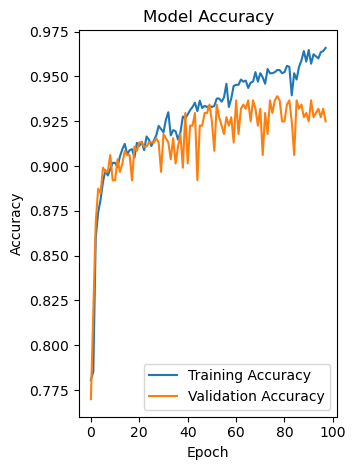

In [59]:
plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
# Evaluate the model on the validation data
final_val_loss, final_val_accuracy = model3.evaluate(X_test, y_test)

print(f'Final Validation Loss: {final_val_loss:.4f}')
print(f'Final Validation Accuracy: {final_val_accuracy:.5f}')

14/14 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.9390
Final Validation Loss: 0.2140
Final Validation Accuracy: 0.93897
